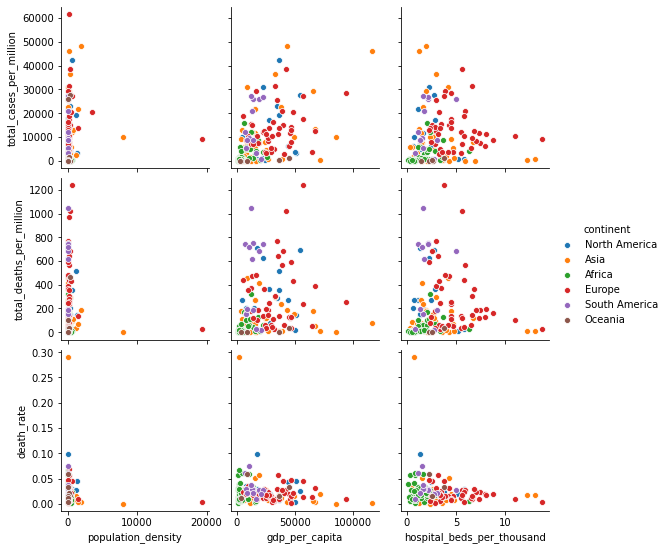

In [1]:
## QUESTION A) start ---

import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns

# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','total_cases_per_million',
          'total_deaths_per_million','population_density','gdp_per_capita','hospital_beds_per_thousand']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']

# Change DataFrame to the date we want
df = df.loc[df.date == '2020-11-01']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])




In [2]:
# Pearson Correlation Coefficient and p-values function
from scipy.stats import pearsonr

def correlationCoefficient(flag=0):
    values = []
    if flag==0:
        pair1 = df.dropna(subset = ['population_density', 'death_rate'], how ='any')
        values.append(pearsonr(pair1.population_density, pair1.death_rate))

        pair2 = df.dropna(subset = ['population_density', 'total_deaths_per_million'], how ='any')
        values.append(pearsonr(pair2.population_density, pair2.total_deaths_per_million))

        pair3 = df.dropna(subset = ['population_density', 'total_cases_per_million'], how ='any')
        values.append(pearsonr(pair3.population_density, pair3.total_cases_per_million))
    
    elif flag==1:
            pair1 = df.dropna(subset = ['log_population_density', 'death_rate'], how ='any')
            values.append(pearsonr(pair1.log_population_density, pair1.death_rate))

            pair2 = df.dropna(subset = ['log_population_density', 'total_deaths_per_million'], how ='any')
            values.append(pearsonr(pair2.log_population_density, pair2.total_deaths_per_million))

            pair3 = df.dropna(subset = ['log_population_density', 'total_cases_per_million'], how ='any')
            values.append(pearsonr(pair3.log_population_density, pair3.total_cases_per_million))
    
    pair4 = df.dropna(subset = ['gdp_per_capita', 'death_rate'], how ='any')
    values.append(pearsonr(pair4.gdp_per_capita, pair4.death_rate))

    pair5 = df.dropna(subset = ['gdp_per_capita', 'total_deaths_per_million'], how ='any')
    values.append(pearsonr(pair5.gdp_per_capita, pair5.total_deaths_per_million))

    pair6 = df.dropna(subset = ['gdp_per_capita', 'total_cases_per_million'], how ='any')
    values.append(pearsonr(pair6.gdp_per_capita, pair6.total_cases_per_million))

    pair7 = df.dropna(subset = ['hospital_beds_per_thousand', 'death_rate'], how ='any')
    values.append(pearsonr(pair7.hospital_beds_per_thousand, pair7.death_rate))

    pair8 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_deaths_per_million'], how ='any')
    values.append(pearsonr(pair8.hospital_beds_per_thousand, pair8.total_deaths_per_million))

    pair9 = df.dropna(subset = ['hospital_beds_per_thousand', 'total_cases_per_million'], how ='any')
    values.append(pearsonr(pair9.hospital_beds_per_thousand, pair9.total_cases_per_million))
    
    printPearson(values)

from prettytable import PrettyTable
def printPearson(values):
    t = PrettyTable(['Pearson Correlation Coefficient','death_rate', 'total_deaths_per_million','total_cases_per_million'])
    t.add_row(['(log)population_density', values[0][0], values[1][0],values[2][0]])
    t.add_row(['gdp_per_capita', values[3][0], values[4][0], values[5][0]])
    t.add_row(['hospital_beds_per_thousand', values[6][0], values[7][0], values[8][0]])
    print(t)
    t = PrettyTable(['p-value', 'death_rate', 'total_deaths_per_million','total_cases_per_million'])
    t.add_row(['(log)population_density', values[0][1], values[1][1],values[2][1]])
    t.add_row(['gdp_per_capita', values[3][1], values[4][1], values[5][1]])
    t.add_row(['hospital_beds_per_thousand', values[6][1], values[7][1], values[8][1]])
    print(t)

In [3]:
correlationCoefficient()

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|     (log)population_density     | -0.10000651310915307 |  -0.058397547975040334   |   0.062125559569446515  |
|          gdp_per_capita         | -0.14965474185667882 |    0.2541340058740727    |    0.5159806204623202   |
|    hospital_beds_per_thousand   |  -0.184789549051784  |   0.05864998409761146    |    0.1423786439787726   |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+----------------------+--------------------------+-------------------------+
|          p-value           |      death_rate      | total_deaths_per_million | total_cases_per_million |
+-

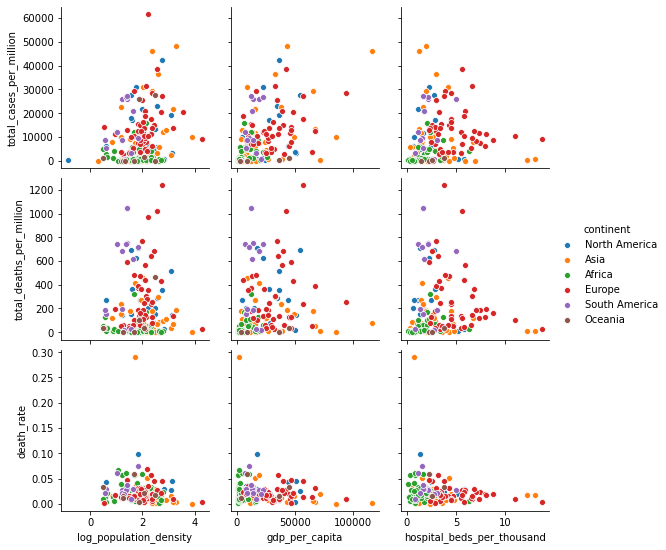

In [4]:
# Take the log of population_density
df['log_population_density'] = np.log10(df['population_density'])
df = df.drop(columns = ['population_density'])

# Change DataFrame to the date we want
df = df.loc[df.date == '2020-11-01']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [5]:
# Calculate new Pearson coefficients and p-values for log_population_density
correlationCoefficient(1)

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|     (log)population_density     | -0.13084081983701423 |   0.01163448498135465    |   0.19801683582445173   |
|          gdp_per_capita         | -0.14965474185667882 |    0.2541340058740727    |    0.5159806204623202   |
|    hospital_beds_per_thousand   |  -0.184789549051784  |   0.05864998409761146    |    0.1423786439787726   |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+----------------------+--------------------------+-------------------------+
|          p-value           |      death_rate      | total_deaths_per_million | total_cases_per_million |
+-

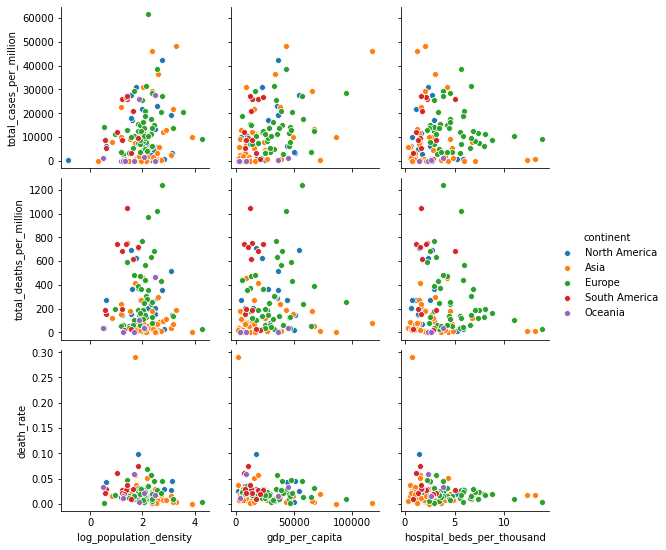

In [6]:
# Without African continent
df = df.loc[df.continent != 'Africa']

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [7]:
# Calculate again the Pearson Correlation Coefficient and p-values without African continent
correlationCoefficient(1)

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|     (log)population_density     | -0.14181218461421508 |   -0.0829348431486697    |    0.1728580247964166   |
|          gdp_per_capita         | -0.1922099702749785  |   0.07905175694387796    |    0.417222039331797    |
|    hospital_beds_per_thousand   | -0.20740573139650811 |   -0.08403396676290859   |   0.00961541337152054   |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+----------------------+--------------------------+-------------------------+
|          p-value           |      death_rate      | total_deaths_per_million | total_cases_per_million |
+-

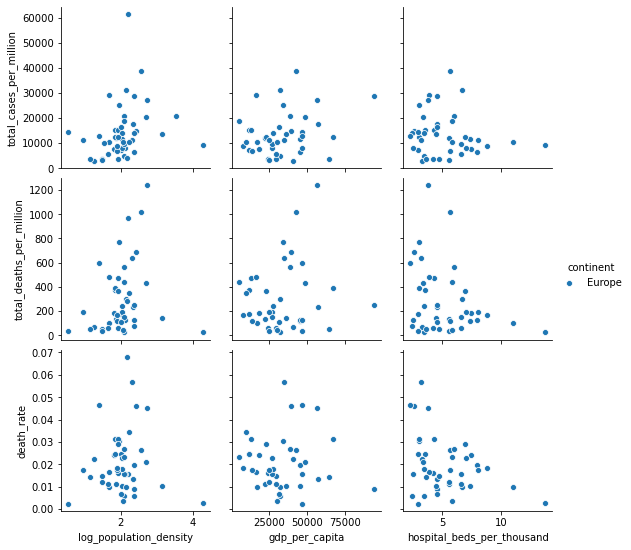

In [8]:
# Only European countries
df = df.loc[df.continent == 'Europe']
std= df.total_cases_per_million.std()
mean=df.total_cases_per_million.mean()

# Create seaborn.pairplot
sns.pairplot(df, hue = 'continent',
             x_vars = ['log_population_density','gdp_per_capita', 'hospital_beds_per_thousand'], 
             y_vars = ['total_cases_per_million','total_deaths_per_million', 'death_rate'])

In [9]:
# Calculate again the Pearson Correlation Coefficient and p-values for Europe
correlationCoefficient(1)

+---------------------------------+----------------------+--------------------------+-------------------------+
| Pearson Correlation Coefficient |      death_rate      | total_deaths_per_million | total_cases_per_million |
+---------------------------------+----------------------+--------------------------+-------------------------+
|     (log)population_density     | 0.042240445009964586 |   0.22559693306395764    |    0.2418379253659753   |
|          gdp_per_capita         | -0.00805627790140381 |   0.15090242575512589    |   0.25657713292004464   |
|    hospital_beds_per_thousand   | -0.33914442154125063 |   -0.2759067046225694    |   -0.13101030755302753  |
+---------------------------------+----------------------+--------------------------+-------------------------+
+----------------------------+---------------------+--------------------------+-------------------------+
|          p-value           |      death_rate     | total_deaths_per_million | total_cases_per_million |
+---

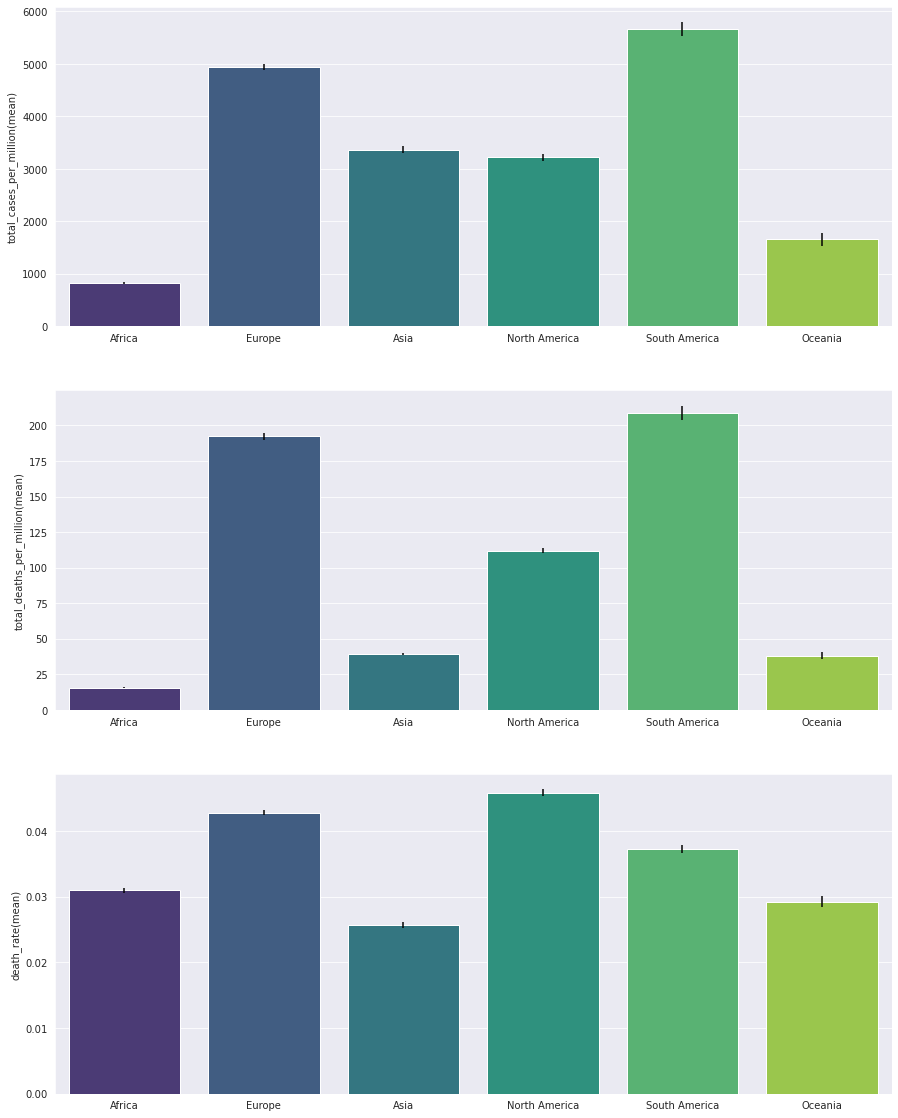

In [10]:
## QUESTION B) start ---

# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','total_cases_per_million',
          'total_deaths_per_million','population_density','gdp_per_capita','hospital_beds_per_thousand']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']


means_per_continent = []
error_per_continent = []
continents = ['Africa', 'Europe', 'Asia', 'North America', 'South America', 'Oceania']

# Find means for the columns we need
for i in continents:
    df_per_continent = df.loc[df.continent == i]
    means_per_continent.append([df_per_continent['total_cases_per_million'].mean(),
                                df_per_continent['total_deaths_per_million'].mean(),
                                df_per_continent['death_rate'].mean()])
    error_per_continent.append([df_per_continent['total_cases_per_million'].sem(),
                                df_per_continent['total_deaths_per_million'].sem(),
                                df_per_continent['death_rate'].sem()])

# Create the DataFrame
df2 = pd.DataFrame(means_per_continent,
                   index =continents,
                   columns = ['total_cases_per_million(mean)', 'total_deaths_per_million(mean)', 'death_rate(mean)'])

# Display the bar plots with error bars
sns.set_style("darkgrid")
fig = plt.figure(figsize=(15,20))
for i in range(3):
    sem_error = [x[i] for x in error_per_continent]
    plt.subplot(3,1,i+1)
    if i==0: g =sns.barplot(x= continents, y= 'total_cases_per_million(mean)', data= df2, yerr = sem_error, palette='viridis')
    elif i==1: g =sns.barplot(x= continents, y= 'total_deaths_per_million(mean)', data= df2, yerr = sem_error, palette='viridis')
    else: g =sns.barplot(x= continents, y= 'death_rate(mean)', data= df2, yerr= sem_error, palette='viridis')


In [11]:
from scipy.stats import ttest_ind

# Display t-tests' results
print(ttest_ind(df2['total_cases_per_million(mean)'].values, df2['total_deaths_per_million(mean)'].values))
print(ttest_ind(df2['total_cases_per_million(mean)'].values, df2['death_rate(mean)'].values))
print(ttest_ind(df2['total_deaths_per_million(mean)'].values, df2['death_rate(mean)'].values))

Ttest_indResult(statistic=4.205511483089333, pvalue=0.0018127776488995055)
Ttest_indResult(statistic=4.343423493459583, pvalue=0.0014585267700214473)
Ttest_indResult(statistic=2.953248354880107, pvalue=0.014454105213378537)


In [12]:
#LATER TO SEE NORMALITY OF OUR DATA
from scipy import stats
stats.shapiro(df['total_cases'])

/home/left/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=nan, pvalue=1.0)

In [13]:
## QUESTION C) start ---

import pandas as pd
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
# Load the data (create the DataFrame)
fields = ['iso_code','continent','location','date','total_cases','total_deaths','new_cases',
          'new_deaths']

# Add also death_rate column
df = pd.read_csv('/home/left/Desktop/dataMining/set1/owid-covid-data.csv', usecols = fields)
df['death_rate'] = df['total_deaths']/df['total_cases']

# Get datetime objects from date column
df = df.loc[df.location != 'International']
df = df.loc[df.location != 'World']
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df = df.sort_values(by = ['date', 'iso_code'])


In [14]:
from scipy import stats
cases_monthly = []
deaths_monthly = []
ratio_monthly = []
np.seterr(all='ignore')
error = []

for i in range(1,12):
    data = df.loc[df.month == i]
    
    #cases_today = data.new_cases.mean()
    #deaths_today = data.new_deaths.mean()    
    ratio_today = data.new_deaths.values/data.new_cases.values

    cases_monthly.append(data.new_cases.mean())
    deaths_monthly.append(data.new_deaths.mean() )
    ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(data.new_deaths.values/data.new_cases.values)])))
    error.append([data.new_cases.sem(),
                  data.new_deaths.sem(),
                  stats.sem(ratio_today, nan_policy='omit')])


In [15]:
# Creating the dataframe we want for our visualization
from datetime import datetime
new_df = pd.DataFrame({'new_cases_monthly':cases_monthly, 'new_deaths_monthly':deaths_monthly, 'ratio_monthly':ratio_monthly})
new_df.index+=1
months = np.array([])

for x in new_df.index:
    datetime_object = datetime.strptime(str(x), "%m")
    full_month_name = datetime_object.strftime("%B")
    months = np.append(months,full_month_name)
    
new_df = new_df.set_index(months)
new_df.index.name = 'month'


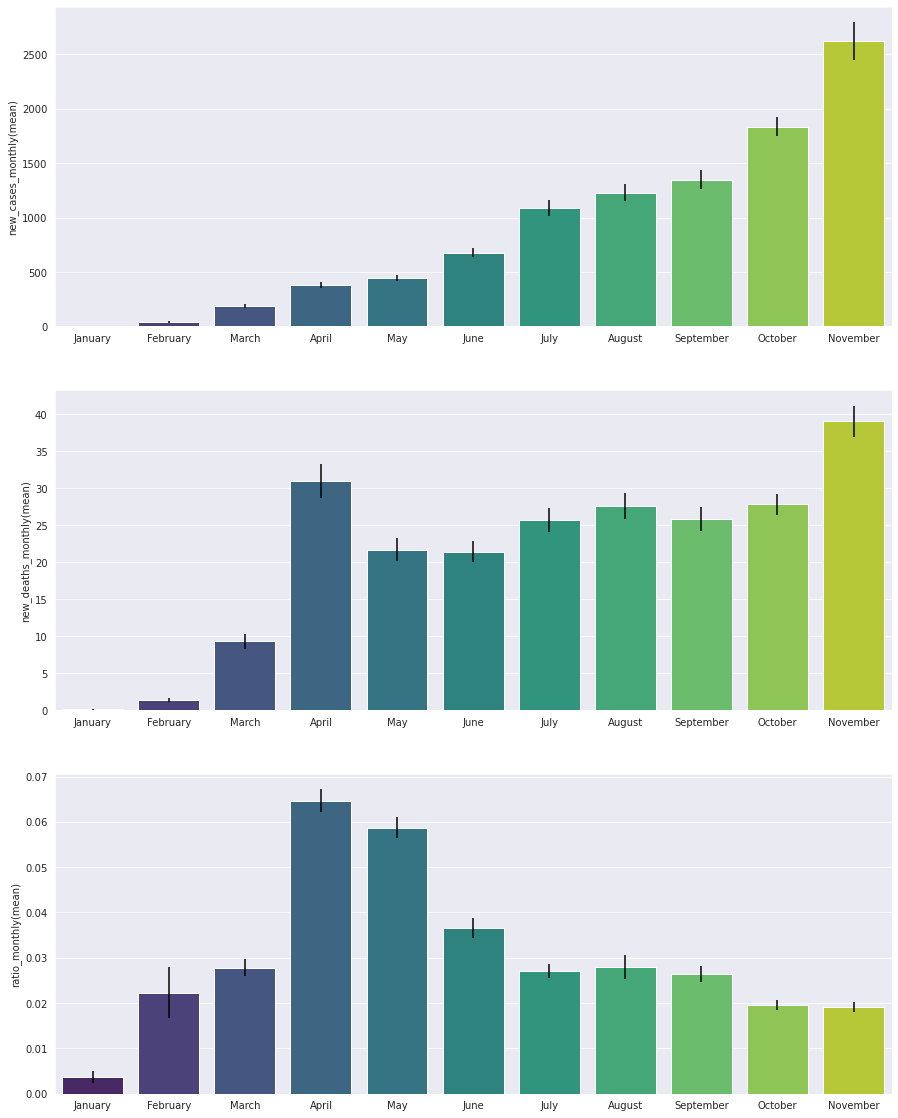

In [17]:
# Display our bar plots for all continents together
sns.set_style("darkgrid")
fig = plt.figure(figsize=(15,20))
for i in range(3):
    sem_error = [x[i] for x in error]
    plt.subplot(3,1,i+1)
    if i==0:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.new_cases_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='new_cases_monthly(mean)')
    elif i==1:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.new_deaths_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='new_deaths_monthly(mean)')
    else:
        g = sns.barplot(data=new_df, x=new_df.index.tolist(),
                        y=new_df.ratio_monthly.tolist(), palette="viridis", yerr = sem_error)
        g.set(ylabel='ratio_monthly(mean)')

In [19]:
# Do the same process but for each continent separately
from scipy import stats
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
cases_monthly = []
deaths_monthly = []
ratio_monthly = []
error = []
np.seterr(all='ignore')

for i in range(1,12):
    
    for j in range(len(continents)):
        data = df.loc[df.month == i]
        data = data.loc[data.continent == continents[j]]
        # Actually here we calc the mean of cases and deaths and death ratio for each month
        # We could do a big for-loop to parse day-by-day, but the result would be pretty much the same
        # because python gives us huge decimal precision. The difference finding the mean by using sum()
        # for a month than calculate the mean of cases or deaths day by day is: +- 0.0000000001,
        # so no point to parse a month day by day.
        ratio_today = data.new_deaths.values/data.new_cases.values

        cases_monthly.append(data.new_cases.mean())
        deaths_monthly.append(data.new_deaths.mean())
        ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(ratio_today)])))


        error.append([data.new_cases.sem(),
                  data.new_deaths.sem(),
                  stats.sem(ratio_today, nan_policy='omit')])

<ipython-input-19-512e89215428>:24: RuntimeWarning: Mean of empty slice
  ratio_monthly.append((np.nanmean(ratio_today[np.isfinite(ratio_today)])))


In [20]:
# Creating the dataframe we need for the visualization
from datetime import datetime
df_continents = pd.DataFrame({'continent':continents*11,'new_cases_monthly':cases_monthly, 'new_deaths_monthly':deaths_monthly,
                              'ratio_monthly':ratio_monthly})

df_continents['sem_new_cases'] = [x[0] for x in error]
df_continents['sem_new_deaths'] = [x[1] for x in error]
df_continents['sem_ratio'] = [x[2] for x in error]

df_continents.to_csv(r'/home/left/Desktop/test.csv')

In [22]:
# This dataframe has 66 rows, because we have 6 continents X 11 months,
# First 6 rows are continents data for January,
# Last 6 rows are continents data for November, etc.
df_continents.tail()

,continent,new_cases_monthly,new_deaths_monthly,ratio_monthly,sem_new_cases,sem_new_deaths,sem_ratio
61,Asia,2013.185990,33.553140,0.015288,223.984237,3.439091,0.00115101
62,Europe,5191.874317,75.178142,0.014701,316.771954,5.009575,0.00111704
63,North America,3947.537037,44.577160,0.023243,852.974290,7.950036,0.00252397
64,Oceania,32.407767,0.233010,0.002795,8.980727,0.077373,0.000824689
65,South America,3479.401709,78.115385,0.036600,459.364110,9.671712,0.00575986


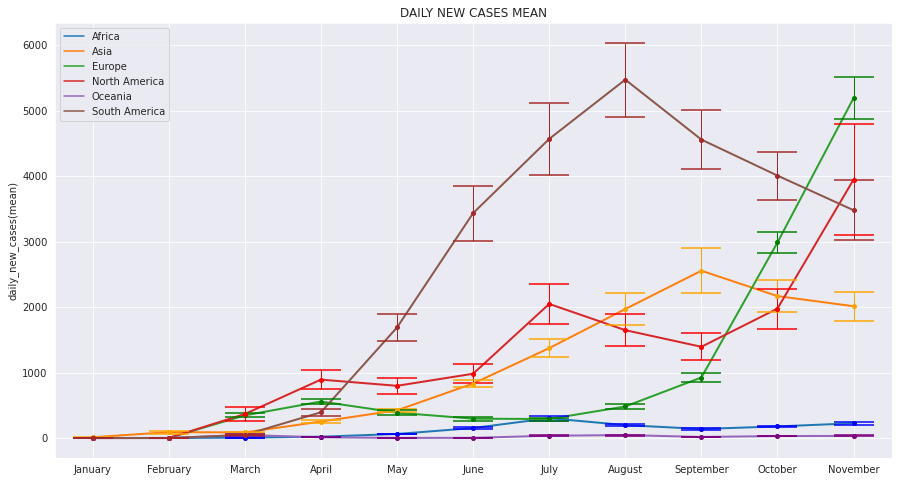

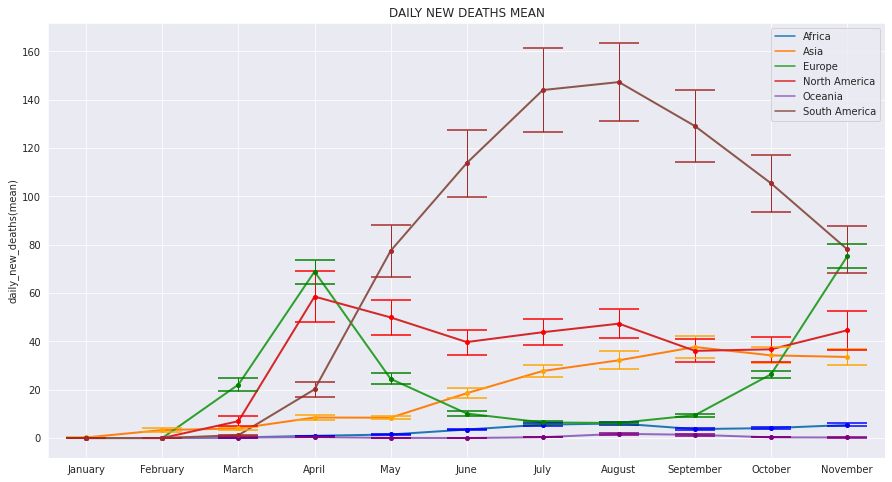

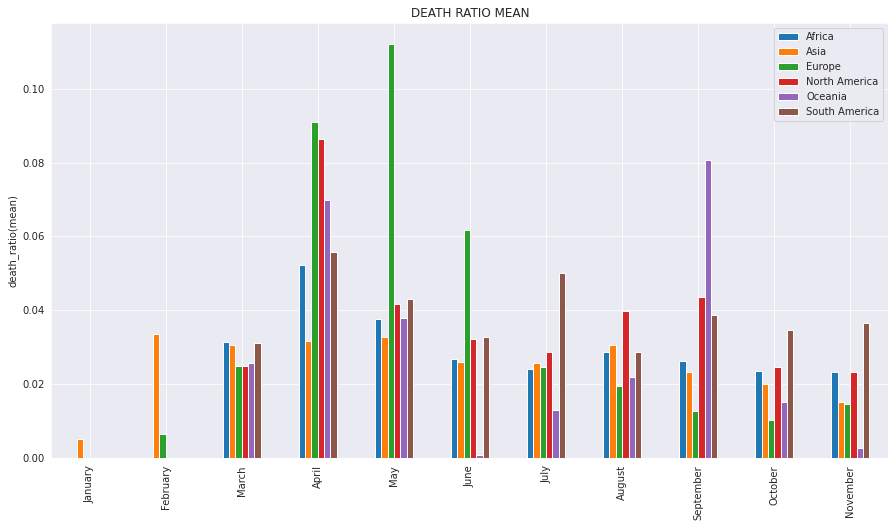

In [23]:
# Now for display all plots using line plots for new_cases_monthly and new_deaths_monthly
# and a bar plot for death_ratio_monthly. That's because Standard Error of the Mean ratio
# is something like 0.000x and with a line plot it is a big confusion.
sns.set_style("darkgrid")
for i in range(3):
    if i == 0:
        final = pd.DataFrame({
            "Africa":df_continents.loc[df_continents.continent=='Africa'].new_cases_monthly.values,
            "Asia":df_continents.loc[df_continents.continent=='Asia'].new_cases_monthly.values,
            "Europe":df_continents.loc[df_continents.continent=='Europe'].new_cases_monthly.values,
            "North America":df_continents.loc[df_continents.continent=='North America'].new_cases_monthly.values,
            "Oceania":df_continents.loc[df_continents.continent=='Oceania'].new_cases_monthly.values,
            "South America":df_continents.loc[df_continents.continent=='South America'].new_cases_monthly.values},
            index=['January','February','March','April','May','June','July','August','September','October','November'])

        values=[final['Africa'].values,final['Asia'],final['Europe'],final['North America'],final['Oceania'],final['South America']]

        yerror =[df_continents.loc[df_continents.continent=='Africa'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='Asia'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='Europe'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='North America'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='Oceania'].sem_new_cases.values,
                 df_continents.loc[df_continents.continent=='South America'].sem_new_cases.values]
        colors=['blue','orange','green','red','purple','brown']

        fig = plt.figure(figsize=(15,8))
        plt.title("DAILY NEW CASES MEAN")
        sns.lineplot(data= final, sort= False, dashes = False, linewidth = 2)
        for j in range(len(values)):
            (_,caps,_)=plt.errorbar(x=range(len(final.index)), y=values[j],elinewidth=1,ecolor=colors[j],
                         yerr=yerror[j],fmt='.',marker='.',markersize=8, capsize=20, mec=colors[j],mfc=colors[j]);
            for cap in caps:
                cap.set_markeredgewidth(1.5)

        plt.ylabel("daily_new_cases(mean)")

    elif i == 1:
        final = pd.DataFrame({
            "Africa":df_continents.loc[df_continents.continent=='Africa'].new_deaths_monthly.values,
            "Asia":df_continents.loc[df_continents.continent=='Asia'].new_deaths_monthly.values,
            "Europe":df_continents.loc[df_continents.continent=='Europe'].new_deaths_monthly.values,
            "North America":df_continents.loc[df_continents.continent=='North America'].new_deaths_monthly.values,
            "Oceania":df_continents.loc[df_continents.continent=='Oceania'].new_deaths_monthly.values,
            "South America":df_continents.loc[df_continents.continent=='South America'].new_deaths_monthly.values},
            index=['January','February','March','April','May','June','July','August','September','October','November'])

        values=[final['Africa'].values,final['Asia'],final['Europe'],final['North America'],final['Oceania'],final['South America']]

        yerror =[df_continents.loc[df_continents.continent=='Africa'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='Asia'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='Europe'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='North America'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='Oceania'].sem_new_deaths.values,
                 df_continents.loc[df_continents.continent=='South America'].sem_new_deaths.values]
        colors=['blue','orange','green','red','purple','brown']

        fig = plt.figure(figsize=(15,8))
        plt.title("DAILY NEW DEATHS MEAN")
        sns.lineplot(data= final, sort= False, dashes = False, linewidth = 2)
        for j in range(len(values)):
            (_,caps,_)=plt.errorbar(x=range(len(final.index)), y=values[j],elinewidth=1,ecolor=colors[j],
                         yerr=yerror[j],fmt='.',marker='.',markersize=8, capsize=20, mec=colors[j],mfc=colors[j]);
            for cap in caps:
                cap.set_markeredgewidth(1.5)

        plt.ylabel("daily_new_deaths(mean)")
        
    else:
        final = pd.DataFrame({
            "Africa":df_continents.loc[df_continents.continent=='Africa'].ratio_monthly.values,
            "Asia":df_continents.loc[df_continents.continent=='Asia'].ratio_monthly.values,
            "Europe":df_continents.loc[df_continents.continent=='Europe'].ratio_monthly.values,
            "North America":df_continents.loc[df_continents.continent=='North America'].ratio_monthly.values,
            "Oceania":df_continents.loc[df_continents.continent=='Oceania'].ratio_monthly.values,
            "South America":df_continents.loc[df_continents.continent=='South America'].ratio_monthly.values},
            index=['January','February','March','April','May','June','July','August','September','October','November'])
        # Replace masked values to NaN
        final['Africa'].values[0] = None
        final['South America'].values[0] = None
        final['South America'].values[1] = None
        #
        
        # Create the plot
        final.plot(figsize=(15,8),kind='bar')
        plt.title("DEATH RATIO MEAN")
        plt.xlabel(None)
        plt.ylabel("death_ratio(mean)")

In [73]:
new_df.to_csv(r'/home/left/Desktop/lastocean.csv')

In [24]:
## QUESTION D) start ---



